In [2]:
# Import packages and set visualization style
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Import data and check out head of DataFrame
df = pd.read_excel('ratings.xlsx')
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
title                1000 non-null object
rating               1000 non-null object
ratingLevel          941 non-null object
ratingDescription    1000 non-null int64
release year         1000 non-null int64
user rating score    605 non-null float64
user rating size     1000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


C:\Users\brsle\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\brsle\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


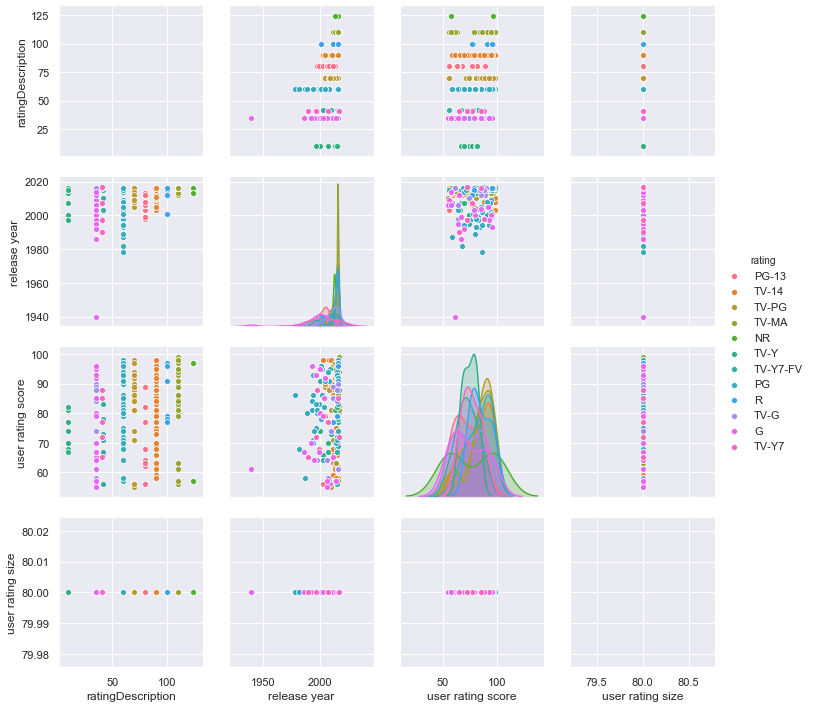

In [4]:
# Drop rows with missing values and drop duplicate
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Visualize pairplot of df
sns.pairplot(df, hue='rating');

In [5]:
# Get summary stats of df
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,246.000000,246.000000,246.000000,246.0
mean,73.556911,2010.272358,81.390244,80.0
std,26.616145,8.887219,12.677883,0.0
min,10.000000,1940.000000,55.000000,80.0
25%,60.000000,2007.000000,71.000000,80.0
50%,80.000000,2015.000000,83.500000,80.0
75%,90.000000,2016.000000,92.750000,80.0
max,124.000000,2017.000000,99.000000,80.0


## Release Year Work

In [6]:
# Group by year
df_by_year = df.groupby('release year')

In [7]:
# Check type of GroupBy object
type(df_by_year)

pandas.core.groupby.generic.DataFrameGroupBy

In [8]:
# Summary stats over years
df_by_year.describe().head()

ratingDescription                                          \
                         count  mean std   min   25%   50%   75%   max   
release year                                                             
1940                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1978                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1982                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1986                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1987                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   

             user rating score        ...             user rating size        \
                         count  mean  ...   75%   max            count  mean   
release year                          ...                                      
1940                       1.0  61.0  ...  61.0  61.0              1.0  80.0   
1978                       1.0  86.0  ...  86.0  86.0              1.0  80.0   
1982                       1.0  68.0  ...  68.0  68.0              1.0  80.0   
1986                       1.0  67.0  ...  67.0  67.0              1.0  80.0   
1987                       1.0  58.0  ...  58.0  58.0              1.0  80.0   

                                                
             std   min   25%   50%   75%   max  
release year                                    
1940         NaN  80.0  80.0  80.0  80.0  80.0  
1978         NaN  80.0  80.0  80.0  80.0  80.0  
1982         NaN  80.0  80.0  80.0  80.0  80.0  
1986         NaN  80.0  80.0  80.0  80.0  80.0  
1987         NaN  80.0  80.0  80.0  80.0  80.0  

[5 rows x 24 columns]

In [9]:
# Cast grouping as a list and check out one year
list(df_by_year)[10]

(1995,             title rating                                ratingLevel  \
 766         Balto      G  General Audiences. Suitable for all ages.   
 967  Heavyweights     PG              some rude language and pranks   
 
      ratingDescription  release year  user rating score  user rating size  
 766                 35          1995               64.0                80  
 967                 60          1995               74.0                80  )

In [10]:
# Get median values by year and print first 5 rows
df_med_by_year = df_by_year.median()
df_med_by_year.head()

,ratingDescription,user rating score,user rating size
release year,,,
1940,35.0,61.0,80.0
1978,60.0,86.0,80.0
1982,60.0,68.0,80.0
1986,35.0,67.0,80.0
1987,60.0,58.0,80.0


In [11]:
# Print index of df
print(df.index)

Int64Index([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            908, 911, 917, 931, 962, 966, 967, 972, 973, 979],
           dtype='int64', length=246)


In [12]:
# Print index
print(df_med_by_year.index)

Int64Index([1940, 1978, 1982, 1986, 1987, 1989, 1990, 1992, 1993, 1994, 1995,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='release year')


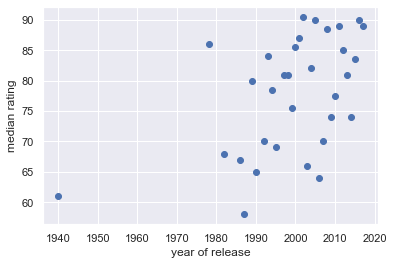

In [13]:
# Slice out user rating and plot
df_rat_by_year = df_med_by_year['user rating score']
plt.scatter(df_rat_by_year.index, df_rat_by_year)
plt.xlabel('year of release')
plt.ylabel('median rating');

## Cleaning the Data and Merging

In [14]:
# Import data and check out head of DataFrame
df2 = pd.read_csv('netflix_titles.csv')
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,9-Sep-16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,8-Sep-18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,8-Sep-18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,8-Sep-17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [15]:
merge_table = pd.merge(df, df2, on="title")
merge_table

,title,rating_x,ratingLevel,ratingDescription,release year,user rating score,user rating size,show_id,type,director,cast,country,date_added,release_year,rating_y,duration,genre,description
0,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,70140391,TV Show,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"June 15, 2019",2018,TV-14,15 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
1,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80,70143825,TV Show,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...",United States,"May 3, 2019",2019,TV-14,14 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
2,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.0,80,70143836,TV Show,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,"August 2, 2013",2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...
3,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2017,91.0,80,70143860,TV Show,NaN,"Nina Dobrev, Paul Wesley, Ian Somerhalder, Ste...",United States,"September 4, 2017",2017,TV-14,8 Seasons,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy","Trapped in adolescent bodies, feuding vampire ..."
4,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,110,2015,98.0,80,70177057,TV Show,NaN,"Andrew Lincoln, Steven Yeun, Norman Reedus, Ch...",United States,"September 1, 2019",2018,TV-MA,9 Seasons,"Classic & Cult TV, TV Action & Adventure, TV D...","In the wake of a zombie apocalypse, survivors ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Bunk'd,TV-G,Suitable for all ages.,35,2016,61.0,80,80072207,TV Show,NaN,"Peyton List, Karan Brar, Skai Jackson, Miranda...",United States,"October 21, 2018",2018,TV-G,3 Seasons,"Kids' TV, TV Comedies","The Ross siblings of Disney's hit series ""Jess..."
118,An American Tail,G,General Audiences. Suitable for all ages.,35,1986,67.0,80,60010082,Movie,Don Bluth,"Erica Yohn, Nehemiah Persoff, Amy Green, Phill...",United States,1-Apr-18,1986,G,80 min,Children & Family Movies,"Fievel, a young Russian mouse, immigrates to A..."
119,Balto,G,General Audiences. Suitable for all ages.,35,1995,64.0,80,60022255,Movie,Simon Wells,"Kevin Bacon, Bob Hoskins, Bridget Fonda, Jim C...",United States,1-Apr-18,1995,G,78 min,"Children & Family Movies, Dramas","Balto, who is half wolf and half dog, endures ..."
120,The Pirate Fairy,G,General Audiences. Suitable for all ages.,35,2014,57.0,80,70302844,Movie,Peggy Holmes,"Mae Whitman, Christina Hendricks, Tom Hiddlest...",United States,15-Jun-14,2014,G,78 min,Children & Family Movies,"In this spritely tale, Tinker Bell and her fri..."


In [16]:
merge_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 18 columns):
title                122 non-null object
rating_x             122 non-null object
ratingLevel          122 non-null object
ratingDescription    122 non-null int64
release year         122 non-null int64
user rating score    122 non-null float64
user rating size     122 non-null int64
show_id              122 non-null int64
type                 122 non-null object
director             27 non-null object
cast                 120 non-null object
country              121 non-null object
date_added           121 non-null object
release_year         122 non-null int64
rating_y             122 non-null object
duration             122 non-null object
genre                122 non-null object
description          122 non-null object
dtypes: float64(1), int64(5), object(12)
memory usage: 18.1+ KB


In [17]:
# Drop rows with missing values and drop duplicate
merge_table.dropna(inplace=True)
merge_table.drop_duplicates(inplace=True)

In [18]:
# Group by year
df_by_genre = merge_table.groupby('genre')

In [19]:
# Check type of GroupBy object
type(df_by_genre)

pandas.core.groupby.generic.DataFrameGroupBy

In [20]:
summed = merge_table.loc[:, ["title", "ratingDescription", "release_year", "genre"]]

In [21]:
summed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 120
Data columns (total 4 columns):
title                26 non-null object
ratingDescription    26 non-null int64
release_year         26 non-null int64
genre                26 non-null object
dtypes: int64(2), object(2)
memory usage: 1.0+ KB


## IMDB Data

In [28]:
# Import data and check out head of DataFrame
imdb = pd.read_csv('imdb_5000.csv', encoding='latin1')
imdb.head()

,director_name,genres,title,title_year,imdb_score
0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,Avatar,2009.0,7.9
1,Gore Verbinski,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,2007.0,7.1
2,Sam Mendes,Action|Adventure|Thriller,Spectre,2015.0,6.8
3,Christopher Nolan,Action|Thriller,The Dark Knight Rises,2012.0,8.5
4,Doug Walker,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,7.1


In [29]:
merge_table2 = pd.merge(df2, imdb, on="title")
merge_table2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,director_name,genres,title_year,imdb_score


### IMDB CSV ANALYSIS

In [7]:
imdb = pd.read_csv('imdb_5000.csv', encoding='latin1')
imdb.head()

,director_name,genres,title,title_year,imdb_score
0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,Avatar,2009.0,7.9
1,Gore Verbinski,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,2007.0,7.1
2,Sam Mendes,Action|Adventure|Thriller,Spectre,2015.0,6.8
3,Christopher Nolan,Action|Thriller,The Dark Knight Rises,2012.0,8.5
4,Doug Walker,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,7.1


In [8]:
imdb.dropna(inplace=True)

In [9]:
# Group by genre
imdb_genre = imdb.groupby('genres')

In [10]:
# Check type of GroupBy object
type(imdb_genre)

pandas.core.groupby.generic.DataFrameGroupBy

In [16]:
print(imdb_genre)

In [17]:
summed_imdb = imdb.loc[:, ["genres", "title_year", "imdb_score"]]

In [18]:
summed_imdb.head()

,genres,title_year,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,2009.0,7.9
1,Action|Adventure|Fantasy,2007.0,7.1
2,Action|Adventure|Thriller,2015.0,6.8
3,Action|Thriller,2012.0,8.5
5,Action|Adventure|Sci-Fi,2012.0,6.6


In [20]:
imdb_year = summed_imdb.groupby('title_year')

In [24]:
# Summary stats over years
imdb_year.describe()

imdb_score                                                  
                count      mean       std  min    25%   50%    75%  max
title_year                                                             
1916.0            1.0  8.000000       NaN  8.0  8.000  8.00  8.000  8.0
1920.0            1.0  4.800000       NaN  4.8  4.800  4.80  4.800  4.8
1925.0            1.0  8.300000       NaN  8.3  8.300  8.30  8.300  8.3
1927.0            1.0  8.300000       NaN  8.3  8.300  8.30  8.300  8.3
1929.0            2.0  7.150000  1.202082  6.3  6.725  7.15  7.575  8.0
...               ...       ...       ...  ...    ...   ...    ...  ...
2012.0          221.0  6.266516  1.102749  1.7  5.600  6.40  7.000  8.5
2013.0          237.0  6.369620  1.105459  2.6  5.800  6.50  7.100  8.4
2014.0          252.0  6.228175  1.147750  2.0  5.600  6.30  7.000  8.7
2015.0          226.0  6.033628  1.251744  2.2  5.200  6.20  7.000  8.6
2016.0          106.0  6.399057  1.168841  3.4  5.725  6.50  7.200  9.1

[91 rows x 8 columns]